# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [56]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
import seaborn as sns
from scipy import stats
sns.set_style("darkgrid")
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [57]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [58]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/anaconda/lib/python3.6/site-packages/pandas/core/indexing.py:477: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


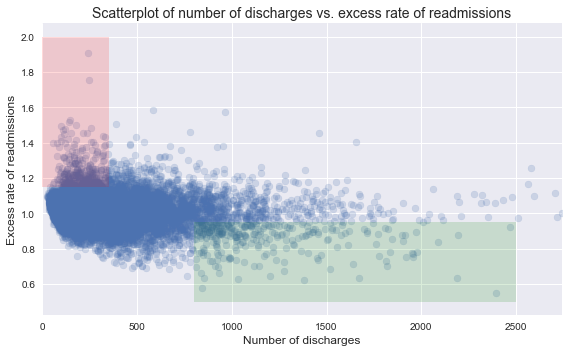

In [59]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
<div class="span5 alert alert-info">
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
</div>
****

In [60]:
# Your turn

In [61]:
clean_hospital_read_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11578 entries, 16857 to 13666
Data columns (total 12 columns):
Hospital Name                 11578 non-null object
Provider Number               11578 non-null int64
State                         11578 non-null object
Measure Name                  11578 non-null object
Number of Discharges          11578 non-null int64
Footnote                      81 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11578 non-null object
End Date                      11578 non-null object
dtypes: float64(5), int64(2), object(5)
memory usage: 1.1+ MB


In [62]:
df = clean_hospital_read_df

In [63]:
df[df['Excess Readmission Ratio']<1]

,Hospital Name,Provider Number,State,Measure Name,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions,Start Date,End Date
7628,VALLEY GENERAL HOSPITAL,500084,WA,READM-30-HF-HRRP,51,NaN,0.9871,23.1,23.4,11.0,07/01/2010,06/30/2013
7120,EXEMPLA SAINT JOSEPH HOSPITAL,60028,CO,READM-30-HF-HRRP,52,NaN,0.9938,21.9,22.0,11.0,07/01/2010,06/30/2013
6827,LA PALMA INTERCOMMUNITY HOSPITAL,50580,CA,READM-30-AMI-HRRP,55,NaN,0.9977,22.1,22.1,12.0,07/01/2010,06/30/2013
8325,LOVELACE WESTSIDE HOSPITAL,320074,NM,READM-30-HF-HRRP,56,NaN,0.9778,22.0,22.5,11.0,07/01/2010,06/30/2013
7130,STURDY MEMORIAL HOSPITAL,220008,MA,READM-30-AMI-HRRP,56,NaN,0.9937,20.3,20.4,11.0,07/01/2010,06/30/2013
7891,KERSHAW HEALTH,420048,SC,READM-30-AMI-HRRP,57,NaN,0.9837,20.9,21.3,11.0,07/01/2010,06/30/2013
8892,BERTRAND CHAFFEE HOSPITAL,330111,NY,READM-30-HF-HRRP,58,NaN,0.9701,22.1,22.7,11.0,07/01/2010,06/30/2013
7060,FALLBROOK HOSPITAL DISTRICT,50435,CA,READM-30-HF-HRRP,58,NaN,0.9946,19.5,19.6,11.0,07/01/2010,06/30/2013
6740,SAINT LUKE'S CUSHING HOSPITAL,170133,KS,READM-30-HF-HRRP,58,NaN,0.9989,24.3,24.3,14.0,07/01/2010,06/30/2013
10741,SOUTHERN CALIFORNIA HOSPITAL AT HOLLYWOOD,50135,CA,READM-30-HF-HRRP,58,NaN,0.9416,25.5,27.0,11.0,07/01/2010,06/30/2013


In [64]:
df = df[pd.notnull(df['Excess Readmission Ratio'])]

### A. Do you agree with the above analysis and recommendations? Why or why not?

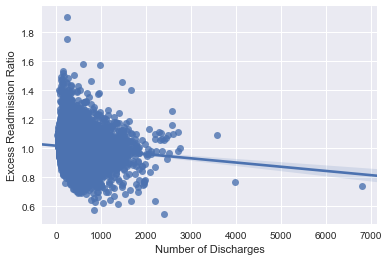

In [65]:
sns.regplot(x="Number of Discharges", y="Excess Readmission Ratio", data=df)

** A. Initial observations based on the plot above** 

+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green)

There is **too much noise in the plot above to reach any conclusive evidence on the relationship between Number of discharges and Readmission ratios**. Most of the points are clustered around the 500-1500 Discharges. However, the Excess readmission ratio varies widely. 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

In [66]:
df_less_than_100 = df[df['Number of Discharges'] < 100]

In [67]:
df2 = df_less_than_100['Excess Readmission Ratio']

In [68]:
print ('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is:',df2.mean())

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is: 1.0226183501683506


In [69]:
excess_readmission_ratio = df_less_than_100[df_less_than_100['Excess Readmission Ratio']>1].count()/df_less_than_100['Excess Readmission Ratio'].count()

In [70]:
print ('In hospitals/facilities with number of discharges < 100,',excess_readmission_ratio['Excess Readmission Ratio'] , 'have excess readmission rate greater than 1')

In hospitals/facilities with number of discharges < 100, 0.632154882155 have excess readmission rate greater than 1


In [71]:
df_more_than_1000 = df[df['Number of Discharges'] > 1000]

In [72]:
df3 = df_more_than_1000['Excess Readmission Ratio']

In [73]:
print ('In hospitals/facilities with number of discharges >1000, mean excess readmission rate is:',df3.mean())

In hospitals/facilities with number of discharges >1000, mean excess readmission rate is: 0.9783354211663071


In [74]:
excess_readmission_ratio = df_more_than_1000[df_more_than_1000['Excess Readmission Ratio']>1].count()/df_more_than_1000['Excess Readmission Ratio'].count()

In [75]:
print ('In hospitals/facilities with number of discharges > 1000,',excess_readmission_ratio['Excess Readmission Ratio'] , 'have excess readmission rate greater than 1')

In hospitals/facilities with number of discharges > 1000, 0.444924406048 have excess readmission rate greater than 1


<ul>
<li> In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 </li>
<li> In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 </li>
</ul>

** The above statements are true based on the data **

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

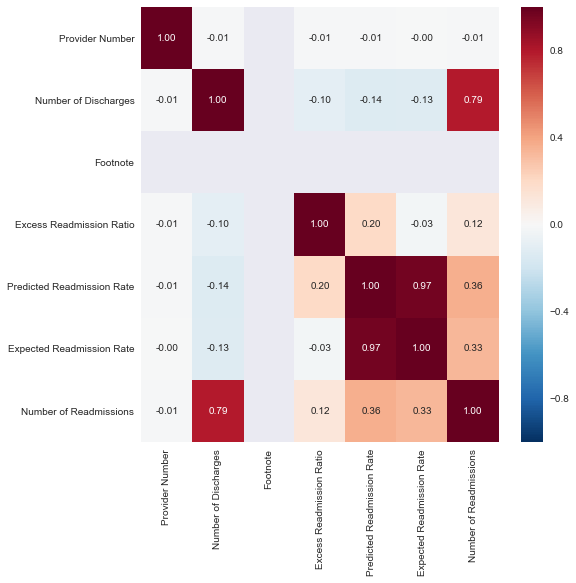

In [139]:
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", ax=ax)

In [77]:
df['Number of Discharges'].corr(df['Expected Readmission Rate'])

-0.13109068110461913

There is a correlation between between hospital capacity and readmission rates. The Correlation rate is **-13%** Directionally, it means that as the number of discharges increases, the expected readmission rate decreases.


+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**We do not have sufficient evidence that there is a significant correlation between these 2 variables, and thus no evidence to support that smaller hospitals lead to more readmissions**

Next I will conduct a simple linear regression to test the same hypothesis. 

In [78]:
X=df['Number of Discharges'].values
Y=df['Expected Readmission Rate'].values

In [79]:
slope, intercept, r_value, p_value, std_err = stats.linregress(X,Y)

In [80]:
print('slope =', slope, 'Expected Readmissions/Number of Discharges')
print('intercept =', intercept, 'Number of Discharges')
print ('p value = ' , p_value)

slope = -0.00222511151952 Expected Readmissions/Number of Discharges
intercept = 18.6788984695 Number of Discharges
p value =  3.04857141467e-45


This indicates that there is a **very small negative correlation between Expected Readmissions and Number of discharges. (-0.2%) ** The p -value is <0.0001 indicating that this result is statistically siginificant

### B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Setup an appropriate hypothesis test.
2. Compute and report the observed significance value (or p-value)
3. Report statistical significance for $\alpha$ = .01

H0: μ100 = μ1000 <br>
H1: μ100 <> μ1000 <br>
    where μ is the average excess readmission ratio between groups

In [81]:
print ('In hospitals/facilities with number of discharges < 100, mean excess readmission rate is:',df2.mean())
print ('In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is:',df3.mean())

In hospitals/facilities with number of discharges < 100, mean excess readmission rate is: 1.0226183501683506
In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is: 0.9783354211663071


**We will now test if this difference is statistically significant. **

In [82]:
stats.ttest_ind(df2, df3)

Ttest_indResult(statistic=10.060620398500793, pvalue=3.778753923341558e-23)

Since our p-value is < 0.01 we can say this result is statistically significant. This mean that **there is a significant difference in Excess Readmission rates for hospitals with < 100 and >1000 discharges **

**4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client? **

In [83]:
df2.mean()-df3.mean()

0.04428292900204345

We have demonstrated 2 important findings from our analysis above: 

1. There is **not enough evidence** that smaller hospitals lead to higher readmission rates. While there is a correlation, we cannot make policy decisions based on insufficent data. 
2. There is a significant difference in Excess readmission rates between smaller and larger hospitals. However, the **practical difference** is only 0.04 "patients". While this result may be numerically significant, it is not not big enough to warrant an upheaval of small hospitals.

Overall, I would not recommend smaller hospitals be forced to consolidate into bigger hospitals. Statistics above prove that there isnt enough evidence to prove that their quality of care is different from larger hospitals. In fact, smaller hospitals provide more personalized attention to patients than bigger hospitals can afford to. 

   ** 5. Look at the scatterplot above. **
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.

In [84]:
pdf = df.fillna(0)
melted_df = pd.melt(pdf, 
                    id_vars=["Number of Discharges", "Excess Readmission Ratio"], # Variables to keep
                    var_name="Stat") 

In [85]:
melted_df.tail()

,Number of Discharges,Excess Readmission Ratio,Stat,value
114965,2716,0.9804,End Date,06/30/2013
114966,2740,1.0003,End Date,06/30/2013
114967,3570,1.0896,End Date,06/30/2013
114968,3980,0.7682,End Date,06/30/2013
114969,6793,0.7379,End Date,06/30/2013


In [86]:
x = df[['Number of Discharges', 'Excess Readmission Ratio']]

In [87]:
x.tail()

,Number of Discharges,Excess Readmission Ratio
8126,2716,0.9804
6643,2740,1.0003
1892,3570,1.0896
13615,3980,0.7682
13666,6793,0.7379


In [133]:
bins = [0, 100, 200, 300, 400, 500, 600, 700, 800, 1000, 1200, 1400, 2000]
group_names = ['0-100', '100-200', '200-300', '300-400', '400-500', '500-600', '600-700', '700-800', '800-1000', '1000-1200', '1200-1400','1400-2000']
Discharge_categories = pd.cut(x['Number of Discharges'], bins, labels=group_names)
x['Discharge_categories'] = Discharge_categories

/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [134]:
x.head(2000)

,Number of Discharges,Excess Readmission Ratio,Discharge_categories
1832,25,1.0914,0-100
1699,27,1.0961,0-100
1774,28,1.0934,0-100
1853,29,1.0908,0-100
1290,30,1.1123,0-100
1602,31,1.0992,0-100
2048,33,1.0847,0-100
2441,34,1.0738,0-100
2512,34,1.0720,0-100
2825,34,1.0651,0-100


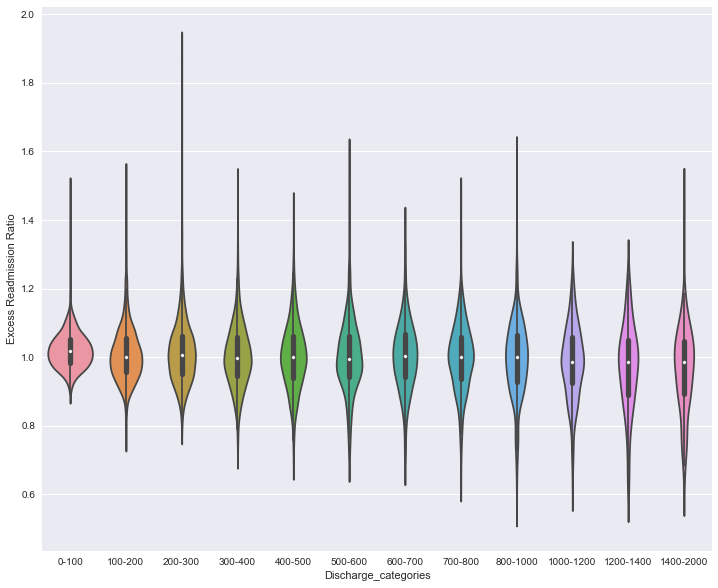

In [136]:
fig, ax = plt.subplots(figsize=(12,10))
sns.violinplot(x='Discharge_categories', y='Excess Readmission Ratio', data=x, ax=ax)
